# Data Training and Testing

In [36]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from sklearn.metrics import \
    classification_report, \
    plot_confusion_matrix, \
    confusion_matrix, \
    roc_curve, \
    auc

In [46]:
def load_data(path) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

def plot_ROC(y_test, y_pred, plt_config):    
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=plt_config['figsize'])
        plt.title('ROC')
        plt.plot(fpr, tpr, 'b', label='ROC-AUC = %0.2f' % roc_auc)
        plt.plot([0,1], [0,1], 'y--', label='baseline')

        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc='best')
        plt.show()

def decisionTreeTrain(X_train, y_train, max_depth=10):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    return clf

In [47]:
df = load_data('../csv_data/user_1.csv')

In [48]:
df

,timestamp,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving,class
0,2022-04-17 20:58:59,628.0770,230.351000,5764.60,5094.55,74.2955,0,0,1,0,0,0,0
1,2022-04-17 20:59:00,984.6800,0.000000,NaN,NaN,74.2955,0,0,3,0,0,0,0
2,2022-04-17 20:59:01,1247.5500,29.783600,5807.95,5296.89,64.6675,0,0,1,0,0,0,0
3,2022-04-17 20:59:02,1300.7800,28.949400,5955.68,5187.03,81.9060,12,0,0,0,0,0,0
4,2022-04-17 20:59:03,1363.4500,3.180050,7257.50,7221.94,80.5923,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2022-04-17 22:16:46,45.3112,0.000000,NaN,NaN,61.8435,0,0,0,0,0,1,0
2785,2022-04-17 22:16:47,57924.8000,154.334000,NaN,NaN,56.1350,0,3,0,0,0,0,0
2786,2022-04-17 22:16:48,51.8256,347.849000,NaN,NaN,NaN,0,0,0,0,0,0,0
2787,2022-04-17 22:16:49,0.0000,0.835723,NaN,NaN,NaN,0,0,1,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

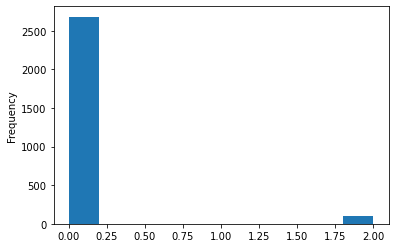

In [49]:
df['class'].plot.hist()

In [50]:
df = df.fillna(-100)
data_X = df.drop(columns = ['timestamp', 'class'])
data_y = df['class']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3)

In [52]:
# model = KNeighborsClassifier(n_neighbors=7)
# model.fit(X_train, y_train)
model = decisionTreeTrain(X_train, y_train)

In [53]:
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       800
           2       0.62      0.41      0.49        37

    accuracy                           0.96       837
   macro avg       0.80      0.70      0.74       837
weighted avg       0.96      0.96      0.96       837



In [54]:
# try to do binary classification
data_X = data_X
binary_data_y = data_y.copy()
binary_data_y[binary_data_y>0] = 1

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data_X, binary_data_y, test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       809
           1       0.47      0.29      0.36        28

    accuracy                           0.97       837
   macro avg       0.72      0.64      0.67       837
weighted avg       0.96      0.97      0.96       837



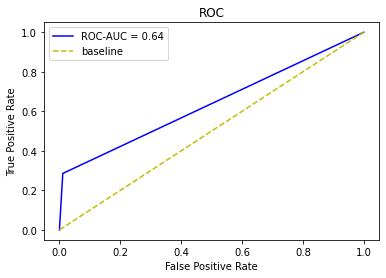

In [56]:
plt_config = {
    'figsize': (6, 4),
    # 'model': ad.mode + ' Detection'
}

plot_ROC(y_test, y_hat, plt_config)